<a href="https://colab.research.google.com/github/AdityaGitHubPro/CodeClause-Detection_of_Parkinson_Disease/blob/main/Detection_Of_The_Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detection of the Parkinson's Disease**

In [18]:
import numpy as np
import pandas as pd

### **Importing the DataSet**

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Data Set Of Machine Learning/pd_speech_features.csv')

In [20]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [21]:
df.tail()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0
755,251,0,0.81304,0.76471,0.46374,340,339,0.005676,0.000037,0.00078,...,62.9927,21.8152,9.2457,4.8555,3.0551,3.0415,4.0116,2.6217,3.1527,0


In [22]:
df.drop('id',axis = 1)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


### **Information of the DataSet**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


### **Shape of the DataSet**

In [24]:
df.shape

(756, 755)

### **checking if there are any null values or not**

In [25]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [26]:
df.duplicated().sum()

1

In [27]:
df.drop_duplicates(inplace =True)

In [28]:
df.duplicated().sum()

0

In [17]:
df.shape

(755, 755)

# **Data Visualization**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Pie Diagram**

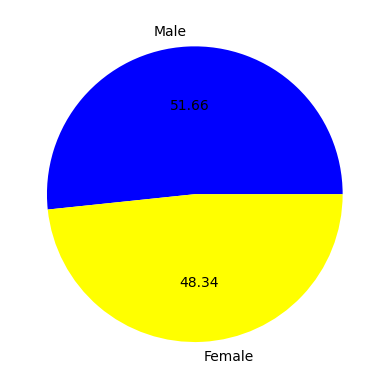

In [31]:
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],colors=['blue','yellow'],autopct='%0.2f')
plt.show()

<Axes: xlabel='class', ylabel='count'>

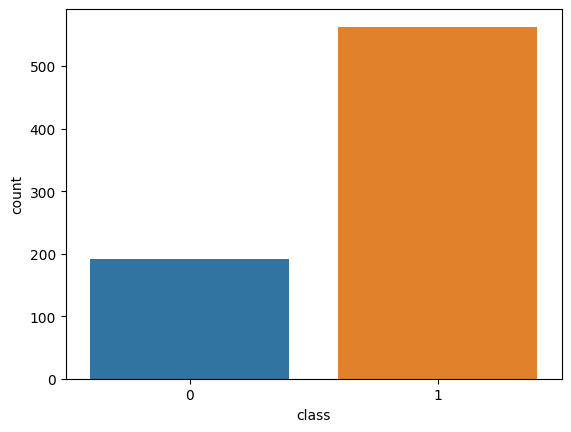

In [32]:
sns.countplot(x=df['class'])

<Axes: xlabel='numPulses', ylabel='Count'>

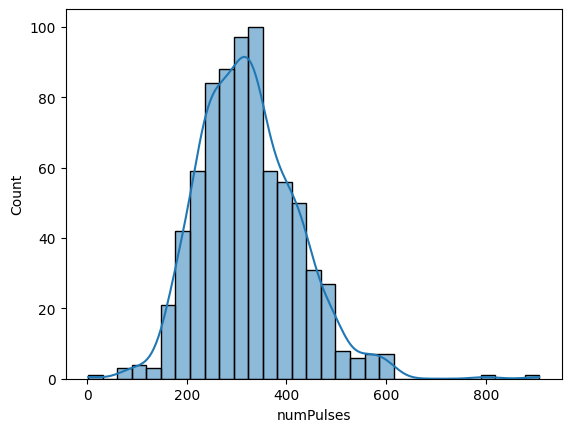

In [33]:
sns.histplot(df['numPulses'],kde=True)

<Axes: xlabel='numPeriodsPulses', ylabel='Count'>

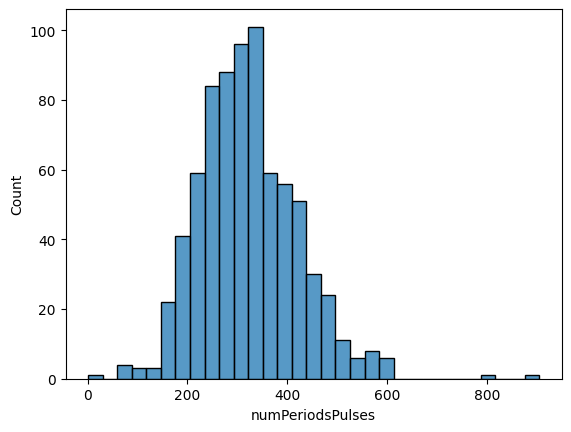

In [34]:
sns.histplot(df['numPeriodsPulses'])

<Axes: xlabel='PPE', ylabel='Density'>

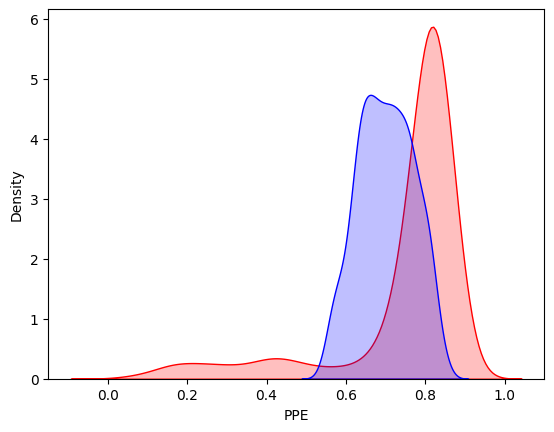

In [35]:
sns.kdeplot(df['PPE'],shade=True, color="r")
sns.kdeplot(df['DFA'],shade=True, color="b")

<Axes: xlabel='meanPeriodPulses', ylabel='Density'>

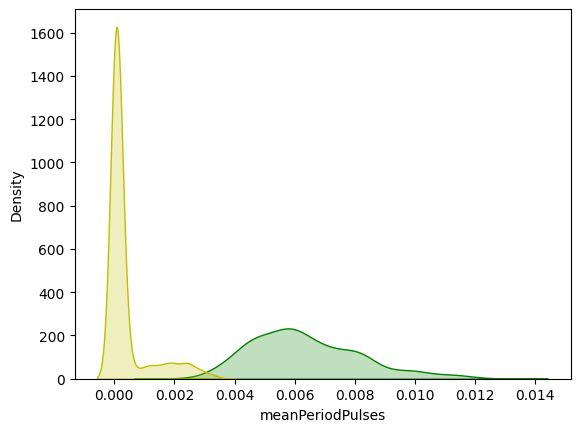

In [36]:
sns.kdeplot(df['meanPeriodPulses'],shade=True, color="g")
sns.kdeplot(df['stdDevPeriodPulses'],shade=True,color="y")

<Axes: xlabel='locPctJitter', ylabel='Density'>

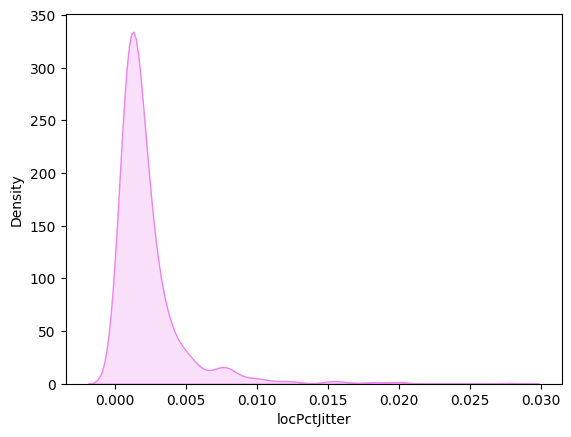

In [37]:
sns.kdeplot(df['locPctJitter'],shade=True, color='violet')

### **Making the Traing and Testing DataSet**

In [38]:
from sklearn.model_selection import train_test_split

x = df.drop("gender", axis = 1)
y = df["gender"]

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
x_train.head()

,id,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
665,221,0.75490,0.62956,0.59795,498,497,0.003876,0.000099,0.00097,0.000004,...,3.0159,2.7802,3.2202,3.6414,5.6255,5.0766,3.5998,2.9165,3.4242,0
74,24,0.20452,0.70358,0.67909,286,285,0.006754,0.002272,0.00333,0.000023,...,3.2624,3.3508,3.3938,3.5254,3.3666,4.1292,5.7149,3.9599,3.3665,0
383,127,0.81547,0.64809,0.60227,243,242,0.007963,0.000090,0.00294,0.000023,...,1.7875,3.9243,5.6226,4.8291,2.8282,2.4950,13.3860,13.2860,53.4437,1
430,143,0.82421,0.67507,0.42552,247,246,0.007795,0.000062,0.00133,0.000010,...,1.5302,46.8701,34.2457,32.0815,30.7043,15.5721,8.4372,10.8210,26.4979,1
245,81,0.55697,0.63389,0.64275,84,83,0.005758,0.000129,0.00195,0.000011,...,2.5572,3.5344,6.1852,3.7248,4.0866,6.7750,5.2769,2.4800,6.0410,1


In [40]:
y_train.head()

665    0
74     0
383    1
430    1
245    1
Name: gender, dtype: int64

In [41]:
x_test.head()

,id,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
292,97,0.74238,0.65942,0.61841,308,307,0.006233,0.000982,0.00373,0.000023,...,3.0604,3.3770,2.8384,2.8505,2.5835,2.2579,10.5575,11.7078,29.9406,1
537,179,0.24164,0.78342,0.63352,239,238,0.008095,0.000158,0.00214,0.000017,...,1.6122,14.7791,20.4438,5.5828,4.4942,6.0828,14.0307,10.6460,10.9042,1
39,13,0.80169,0.72330,0.32538,344,343,0.005614,0.000062,0.00074,0.000004,...,150.5036,118.3144,77.3232,31.2491,24.3041,33.0818,22.9303,10.9895,5.9725,1
77,25,0.83865,0.76831,0.34722,345,344,0.005599,0.000053,0.00082,0.000005,...,26.1771,13.3119,10.7551,11.3129,10.2577,11.5123,14.1357,14.1944,6.2589,1
494,164,0.16701,0.70700,0.61779,226,224,0.007890,0.000074,0.00303,0.000024,...,1.5644,3.1888,5.3921,5.5085,3.0158,5.3762,5.5850,6.8229,35.8466,1


In [42]:
y_train.head()

665    0
74     0
383    1
430    1
245    1
Name: gender, dtype: int64

# **Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
LogisticRegression()
pred_lr=LR.predict(x_test)
LR.score(x_test, y_test)

0.78

In [44]:
from sklearn.metrics import accuracy_score

# **Decision Tree Classifier**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model4=dtc.fit(x_train,y_train)
prediction2=model4.predict(x_test)
accuracy_score(y_test,prediction2)

0.824

# **Random Forest Classifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model8=rfc.fit(x_train,y_train)
prediction3=model8.predict(x_test)
accuracy_score(y_test,prediction3)

0.876

### **So Random Forest Classifier gives the best Accuracy**